<b><font size=20, color='#A020F0'>Homework 2

#### In this homework you'll further explore pandas by working with oceanographic research cruise data from the Arctic

<b><font color='red'>Due Date: 11 October 2021</font></b><br>(by the beginning of class)

<b>How you will turn in this assignment</b><br> When you are ready to turn in your homework, do the following steps:
1. Execute all cells in your notebook so that the results are visible, and save one more time. It is ok if you have code that you practiced with, but <b><u>make sure your final answers to each question are clearly marked so that Cam and I know what to grade</u></b>. (You can also collapse the code and outputs that you _don't_ want us to grade; options to collapse and expand code are in the 'View' menu in the upper left)
2. Open a terminal and navigate to your local `AOS573` repository and make a new directory called `completed_HW2`
3. Move your completed jupyter notebook into this directory
4. `add` and `commit` the `completed_HW2` directory and its contents to your local `AOS573` repository
5. Finally, `push` your changes to your remote `aos573_completed_assignments` repository: `git push finished_work main` (you'll need to enter your username and personal access token)

---

## Part 1: Getting the data and summarizing it
The data we'll be using for this homework is from the [Global Ocean Data Analysis Project (GLODAP)](https://www.glodap.info/), which is a massive, global synthesis of quality-controlled ocean biogeochemical observations. GLODAP contains data from thousands of cruises from the early 1970s to the present. Here we'll only work with data from the Arctic Ocean.

Run the following commands to download and unzip the GLODAP Arctic Ocean data:
```bash
!curl -O https://www.glodap.info/glodap_files/v2.2021/GLODAPv2.2021_Arctic_Ocean.csv.zip
!unzip GLODAPv2.2021_Arctic_Ocean.csv.zip
```

The dataset has far more variables than you'll be working with in this assigment, so to help you out, below I've given you the code to read in only a subset of the variables, and I've renamed the columns slightly. If you want to compare what I've done here to the unsubsetted dataset, feel free to read the entire thing in on your own with `pandas.read_csv()`

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
#List of variables 
names=['station','year','month','day','hour','minute','latitude','longitude','depth','theta','salinity',
                      'salinityf','sigma0','oxygen','oxygenf','cfc11','cfc11f']
#Read in only the variables above with `usecols`
df=pd.read_csv('GLODAPv2.2021_Arctic_Ocean.csv',sep=',',usecols=['G2'+i for i in names])
#Reset the column names to be those in the list above and not the original names, 
#which all have 'G2' appended to the front
df.columns=names

Some dataset info that you will find helpful (or access the entirety of the [metadata](https://www.ncei.noaa.gov/data/oceans/ncei/ocads/metadata/0237935.html) if you would like):

1. year, month, day, hour, minute = sampling date and time
2. latitude/longitude = geographical coordinates of the sampling location
3. depth (m) = the depth of the water sample in meters
4. missing fill value = -9999.0 (the fill value used when data is missing)

Here is a list of the remaining variables, their descriptions, and their units:

| Variable | Description | Unit | 
| - | - | - |
| theta | potential temperature | $^\circ$C |
| salinity | salinity on the practical salinity scale | none |
| salinityf | salinity flag; 0 = interpolated, 2 = good data, 9 = missing data | none |
| sigma0 | potential density referenced to the ocean surface | kg m$^{-3}$ |
| oxygen | oxygen content | $\mu$mol kg$^{-1}$ |
| oxygenf | oxygen flag; 0 = interpolated, 2 = good data, 9 = missing data | none |
| cfc-11 | chlorofluorcarbon-11 content | pmol kg$^{-1}$ |
| cfc-11f | cfc-11 flag; 2 = good data, 9 = missing data | none |

### Q1.1 Get some basic information about your dataframe

#### Q1.1.1 Print the summary information about your dataframe. 
1. How many samples are there for any given variable?
2. How many different datatypes are there?

<b>Answers:</b>
1. 144509
2. 2

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144509 entries, 0 to 144508
Data columns (total 17 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   station    144509 non-null  int64  
 1   year       144509 non-null  int64  
 2   month      144509 non-null  int64  
 3   day        144509 non-null  int64  
 4   hour       144509 non-null  int64  
 5   minute     144509 non-null  int64  
 6   latitude   144509 non-null  float64
 7   longitude  144509 non-null  float64
 8   depth      144509 non-null  float64
 9   theta      144509 non-null  float64
 10  salinity   144509 non-null  float64
 11  salinityf  144509 non-null  int64  
 12  sigma0     144509 non-null  float64
 13  oxygen     144509 non-null  float64
 14  oxygenf    144509 non-null  int64  
 15  cfc11      144509 non-null  float64
 16  cfc11f     144509 non-null  int64  
dtypes: float64(8), int64(9)
memory usage: 18.7 MB


#### Q1.1.2 Print the summary statistics for your dataframe
1. What is the range of latitude and longitude that the dataset covers?
2. What is the mean potential temperature? Does this seem reasonable? What do you think is the cause?

In [44]:
df.describe()

,station,year,month,day,hour,minute,latitude,longitude,depth,theta,salinity,salinityf,sigma0,oxygen,oxygenf,cfc11,cfc11f
count,1.445090e+05,144509.000000,144509.000000,144509.000000,144509.000000,144509.000000,144509.000000,144509.000000,144509.000000,144509.000000,144509.000000,144509.000000,144509.000000,144509.000000,144509.000000,144509.000000,144509.000000
mean,1.034110e+04,2001.368489,7.581223,15.699050,6.235162,15.362393,74.248976,-53.689296,465.398560,-224.086966,-172.966004,2.136877,-198.418005,-1931.896421,3.393034,-8029.537133,7.621788
std,6.973099e+04,7.601711,1.922146,8.882681,7.706087,19.228190,6.079720,89.955559,741.668812,1482.217879,1424.845747,1.002462,1486.108504,4257.534847,2.999573,3977.668471,2.783535
min,0.000000e+00,1974.000000,1.000000,1.000000,0.000000,0.000000,46.867000,-179.890000,-9999.000000,-9999.000000,-9999.000000,0.000000,-9999.000000,-9999.000000,0.000000,-9999.000000,2.000000
25%,4.000000e+01,1996.000000,7.000000,8.000000,0.000000,0.000000,71.200000,-146.702800,36.000000,-1.184700,32.772000,2.000000,26.302000,263.500000,2.000000,-9999.000000,9.000000
50%,1.310000e+02,2002.000000,8.000000,15.000000,1.000000,3.000000,74.302000,-19.318000,148.000000,-0.497340,34.711000,2.000000,27.609029,299.030000,2.000000,-9999.000000,9.000000
75%,5.310000e+02,2007.000000,9.000000,23.000000,13.000000,30.000000,77.567000,4.663500,500.000000,0.904570,34.905000,2.000000,27.991000,322.000000,2.000000,-9999.000000,9.000000
max,1.090900e+06,2019.000000,12.000000,31.000000,23.000000,59.000000,90.000000,179.990000,5450.000000,18.076000,35.836000,9.000000,28.862000,712.900000,9.000000,9.980000,9.000000


In [45]:
print(df.describe().loc['min'][['latitude','longitude']])
print(df.describe().loc['max'][['latitude','longitude']])
print(df.describe().loc['mean']['theta'])

latitude      46.867
longitude   -179.890
Name: min, dtype: float64
latitude      90.00
longitude    179.99
Name: max, dtype: float64
-224.08696633344493


### Q1.2 Replacing missing values
Use [where()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.where.html) to replace all of the missing values with NaNs. Rerun your summary statistics from Q1.1.2. What is the mean potential temperature now? For this question, please print _only_ the new mean value of potential temperature, and not the entire summary statistics table.

In [3]:
df=df.where(df!=-9999.0,other=np.nan)
df.describe().loc['mean']['theta']

0.66662831297908

### Q1.3 A quick look at the data


#### Q1.3.1 Show the last 8 values of the dataset. 
This is the data collected at one stop (a 'station') on one reasearch cruise. You can tell this because the lat/lon values don't change, nor does the date. 

In [47]:
df.tail(8)

,station,year,month,day,hour,minute,latitude,longitude,depth,theta,salinity,salinityf,sigma0,oxygen,oxygenf,cfc11,cfc11f
144501,592,2019,6,3,17,6,70.5007,19.9965,4.0,6.499663,34.2539,2,26.898499,NaN,9,NaN,9
144502,592,2019,6,3,17,6,70.5007,19.9965,10.0,6.509136,34.2536,2,26.897010,NaN,9,NaN,9
144503,592,2019,6,3,17,6,70.5007,19.9965,20.0,6.488268,34.2491,2,26.896216,NaN,9,NaN,9
144504,592,2019,6,3,17,6,70.5007,19.9965,30.0,6.067486,34.3055,2,26.995287,NaN,9,NaN,9
144505,592,2019,6,3,17,6,70.5007,19.9965,50.0,5.975726,34.3723,2,27.059713,NaN,9,NaN,9
144506,592,2019,6,3,17,6,70.5007,19.9965,74.0,5.933703,34.5055,2,27.170306,NaN,9,NaN,9
144507,592,2019,6,3,17,6,70.5007,19.9965,100.0,5.991447,34.6706,2,27.293483,NaN,9,NaN,9
144508,592,2019,6,3,17,6,70.5007,19.9965,120.0,6.029653,34.7345,2,27.339109,NaN,9,NaN,9


#### Q1.3.2 For which variables were data not collected at this station?

<b>Answer:</b> oxygen, cfc-11

#### Q1.3.3 Over what depth range were water samples collected at this station?

In [48]:
print(df.tail(8).iloc[0].loc['depth'])
print(df.tail(8).iloc[-1].loc['depth'])

4.0
120.0


---

## Part 2: Working with the data

### Q2.1 Sorting

#### Q2.1.1 Make a very quick line plot of the years in the dataset
Use pandas built-in plotting and don't bother making any adjustments to the output. What does the plot tell you about how the years are arranged in your dataframe?

<AxesSubplot:>

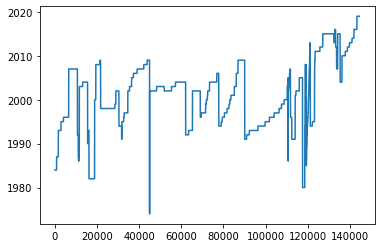

In [49]:
df.year.plot()

#### Q2.1.2 Sort your dataset so that the years are increasing
Use your sorted dataframe for the rest of the assigment

In [6]:
df=df.sort_values('year',ascending=True)
#plt.plot(df.year.unique())

### Q2.2 Counting

#### Q2.2.1 How many samples were taken above and below 500 m?
Base your answer off of depth, not one of the other variables like salinity, etc, as some of those will have missing values.

In [12]:
print(df[df.depth>500].count().loc['depth']) #exclude 500 m
print(df[df.depth<500].count().loc['depth']) #exclude 500 m
#or if 500 m was included in one of the conditions
print(df[df.depth>=500].count().loc['depth']) #depths 500 m and above
print(df[df.depth<=500].count().loc['depth']) #for depths 500 m and below

36116
108040
36468
108392


#### Q2.2.2 How many salinity, oxygen, and CFC-11 samples in the entire dataset were interpolated?
Provide your answers as percentages of the total number of samples for each variable

In [16]:
print(100*df.salinity.where(df.salinityf==0).count()/df.salinity.count())
print(100*df.oxygen.where(df.oxygen==0).count()/df.oxygen.count())
print(100*df.cfc11.where(df.cfc11f==0).count()/df.cfc11.count())

#or divided by the total number of samples, nans included
print(100*df.salinity.where(df.salinityf==0).count()/df.salinityf.count())
print(100*df.oxygen.where(df.oxygen==0).count()/df.oxygenf.count())
print(100*df.cfc11.where(df.cfc11f==0).count()/df.cfc11f.count())

0.37164477542339946
0.0
0.0
0.36399117010013216
0.0
0.0


#### Q2.2.3 Between 1980 and 1990, how many oxygen samples were taken north of 80˚N?

In [31]:
#excludes nans
print(df.oxygen.where(df.year>=1980).where(df.year<1990).where(df.latitude>=80.0).count()) 
#if nans included
print(df.oxygenf.where(df.year>=1980).where(df.year<1990).where(df.latitude>=80.0).count())
#excluding 80˚N and including months up to 1991 makes no difference, nans included or excluded
#print(df.oxygenf.where(df.year>=1980).where(df.year<1991).where(df.latitude>80.0).count())
#print(df.oxygen.where(df.year>=1980).where(df.year<1991).where(df.latitude>80.0).count()) 

1456
1933
1456


#### Q2.2.4 How many distinct locations in the Arctic were sampled?
In this question, I want you to find the total number of _unique_ lat/lon _pairs_. <b> Hint:</b> Take a look at [drop_duplicates()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.drop_duplicates.html)

In [15]:
print(df.drop_duplicates(['latitude','longitude'],keep='first').count().loc[['latitude','longitude']])
#or
#len(set(zip(df.longitude,df.latitude)))

latitude     8046
longitude    8046
dtype: int64


#### Q2.2.5 In what years were the largest and smallest number of samples taken?

In [16]:
yrs=df.year.value_counts(sort='ascending')
print(yrs.head(1))
print(yrs.tail(1))

2002    15365
Name: year, dtype: int64
1974    29
Name: year, dtype: int64


#### Q2.2.6 In how many years were data collected?
How does this compare to the total number of years that the dataset spans?

In [17]:
df.year.value_counts().count()

37

### Q2.3 Make a histogram of the number of samples in each month 
For this problem, you'll need to create a new dataframe using `drop_duplicates()`.  Because the number of sample depths varies per station, if we make a histogram based solely on the 'months' column, we'll skew our results based on the number of depths sampled at a given station. To avoid counting mulitple samples across depth at the same station, what we truly want is the unique _date_ and _time_ that sampling occurred at a particular station, so you should make your histogram based on your new dataframe that ignores duplicate entries for the date and time.

No need to bother making your plot look pretty for this question--as long as you can answer the questions below then it's fine (but do make sure that your plot has one bin per month)!

1. In what month were the largest number of samples taken?
2. In what month were the smallest number of samples taken?
3. Pretend like the data you plotted on your histogram is the data you have for one year. If you took the annual mean of your data, how might you expect your results to be biased (i.e. toward what season would your annual mean skew)?

<b> Answers:</b><br>
Can check the first two with `df2.month.value_counts()`
1. August
2. January
3. Summer

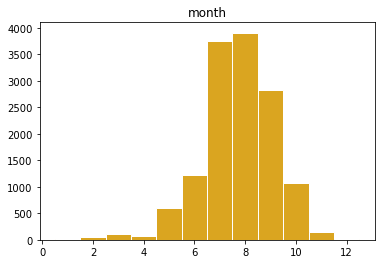

In [29]:
df2=df.drop_duplicates(subset=['year','month','day','hour','minute'], keep='first')
df2.hist('month',grid=False,color='goldenrod',ec='w',bins=np.arange(0.5,12.6,1),width=1);

#or
#df['date']=pd.to_datetime(df[['year', 'month','day','hour','minute']].assign(second=np.zeros(len(df.month.values))))
#df=df.drop_duplicates(subset=['date'], keep='first')
#df.hist('month',grid=False,color='navy',ec='w',ax=plt.gca(),alpha=0.5,bins=np.arange(0.5,12.6,1),width=1)

### Q2.4 Visualizing data with a box plot

#### Q2.4.1 Make a box plot of the spread in number of samples across all months for each year
Use your new dataframe from Q2.3. Your [box plot](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.boxplot.html) should have one box showing the spread in monthly sample numbers for each year. Your x-axis should be the years of the dataset and your y-axis should be the months (these should be numerical). To help get you started, I've set up a bit of the code so that your plot output won't be scrunched together.  All you need to do is add a line of code that makes the box plot and then do the following:

1. Set the ax keyword argument in your boxplot function to be the name of the axis I've created below
2. Turn off the grid
3. Set the x-axis label rotation to be 45˚ 
4. Add a y-axis label
5. Add a title (but first get rid of the default suptitle by setting the suptitle of the plot to an empty string)

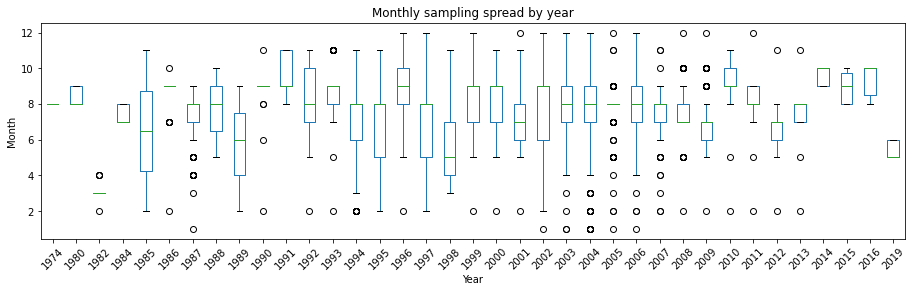

In [34]:
fig,ax=plt.subplots()
fig.set_size_inches(15,4)
#Student-added code
df2.boxplot(column='month',by='year',grid=False,rot=45,ax=ax)
fig.suptitle('')
plt.title('Monthly sampling spread by year')
plt.xlabel('Year')
plt.ylabel('Month');

#### Q2.4.2 Do all years have the same median sampling month?
Do the annual data generally agree with the histogram in Q2.3?

<b>Answer:</b> In general yes, but there definitely are differences, like in 1982.

### Q2.5 Make a set of histograms based on density

#### Q2.5.1
In oceanography, it is often instructive to look at data on density surfaces rather than by depth. In this question, you'll make a 1x3 set of subplots consisting of histograms for the variables theta, oxygen, and cfc-11, binned by potential density (sigma0). In other words, you'll be making summary plots showing the total number of samples of these variables that fall within specific density ranges. 

You'll need to do the following:

1. Group your theta, oxygen, and cfc-11 data by potential density (sigma0). Use the following array as your density bin edges: 
`bin_edges=np.arange(19.9,28.2,0.2)
` <b>Hint</b>: Take a look at [cut()](https://pandas.pydata.org/docs/reference/api/pandas.cut.html) 
2. Make a set of counts for each variable based on the density bins
3. Use [matplotlib bar graphs](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.bar.html) to make the 1x3 set of plots. Be sure to include axes labels, titles, etc. Change the color and edgecolor of the bars and set the bar width to be the width of a single density bin. <b>Note:</b> To make these plots properly with a bar graph, you will need to compute the bin centers from the bin edges and plot your counts vs your bin centers

In [32]:
bin_edges=np.arange(19.9,28.2,0.2)
bin_centers=bin_edges[:-1]+0.5*np.diff(bin_edges)
df_hist=df[['theta','oxygen','cfc11']].groupby(pd.cut(df.sigma0, bin_edges)).count()

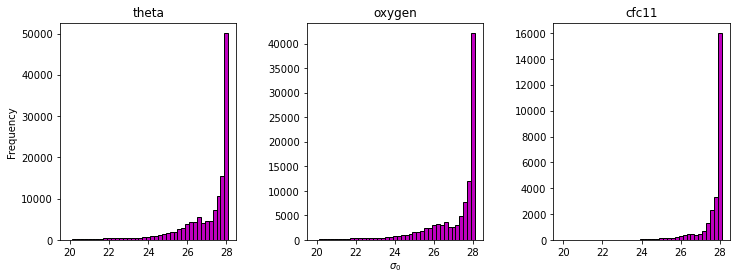

In [20]:
fig,ax=plt.subplots(1,3,sharex=True)
fig.set_size_inches(12,4)
axs=ax.flatten()
for i,var in enumerate(['theta','oxygen','cfc11']):
    axs[i].bar(bin_centers,df_hist[var].values,color='m',ec='k',width=0.2)
    axs[i].set_title(var)
plt.subplots_adjust(wspace=0.4)
axs[0].set_ylabel('Frequency')
axs[1].set_xlabel('$\sigma_{0}$');

#Theoretically this should also work but it's taking forever
#df.hist(['theta','oxygen','cfc11'],by=df.sigma0,bins=bin_edges)

#### Q2.5.2 What density bin contains the largest number of samples?

In [21]:
bin_edges[-2:]
#bin_centers[-1]

array([27.9, 28.1])

#### Q2.5.3 Understanding plt.hist() vs plt.bar()
Look up the documentation for matplotlib's `hist()` function. Given the inputs of this function, why do you suppose we couldn't just feed our output from Q2.5.1 into it in order to make the histograms?

<b>Answer:</b> Because hist() does the counting for you, but you already did this with groupby() and count(). Technically you could just do `df.hist(['theta','oxygen','cfc11'],by='sigma0',bins=bin_edges)` but this seems to take forever and I think it's because of how many different densities there are, or maybe it's just a slow operation